# Рекомендация тарифов

Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
http://localhost:8888/notebooks/recommendation_of_tariffs.ipynb## Подключим библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [8]:
#Сохраним датасет 
tariffs = pd.read_csv('/datasets/users_behavior.csv')
tariffs.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [9]:
#Изучим
display(tariffs.shape)
display(tariffs.describe())
display(tariffs.info())

(3214, 5)

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

Как и было указано - датасет уже обработан, и мы это проверили. Столбец **"is_ultra"** определяет тариф: 1 - **"Ультра"**, 0 - **"Смарт"**.

## Разбейте данные на выборки

In [12]:
# 60% train, 20% valid, 20% test
tariffs_train, tariffs_valid = train_test_split(tariffs, test_size=0.4, random_state=12345)
tariffs_valid, tariffs_test = train_test_split(tariffs_valid, test_size=0.5, random_state=12345)

print('Размер обучающей выборки:', tariffs_train.shape[0],'объектов')
print('Размер валидационной выборки:', tariffs_valid.shape[0],'объекта')
print('Размер тестовой выборки:',tariffs_test.shape[0],'объекта')

Размер обучающей выборки: 1928 объектов
Размер валидационной выборки: 643 объекта
Размер тестовой выборки: 643 объекта


## Исследуйте модели

In [13]:
#Признаки и целевые признаки
features = tariffs.drop(['is_ultra'], axis=1)
target = tariffs['is_ultra']

#Валидационная выборка
valid_features = tariffs_valid.drop(['is_ultra'], axis=1)
valid_target = tariffs_valid['is_ultra']

#Обучающая выборка
train_features = tariffs_train.drop(['is_ultra'], axis=1)
train_target = tariffs_train['is_ultra']

#Тестовая выборка
test_features = tariffs_test.drop(['is_ultra'], axis=1)
test_target = tariffs_test['is_ultra']

In [15]:
# Обучим модель Дерево Принятия Решения
depths = []
DTC_accuracies = []

for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features,train_target)
    predictions = model.predict(valid_features)
    accuracy = accuracy_score(valid_target, predictions)
    depths.append(depth)
    DTC_accuracies.append(accuracy)
    print('Depth:', depth, end='')
    print('        Accuracy:', accuracy)

Depth: 1        Accuracy: 0.7542768273716952
Depth: 2        Accuracy: 0.7822706065318819
Depth: 3        Accuracy: 0.7853810264385692
Depth: 4        Accuracy: 0.7791601866251944
Depth: 5        Accuracy: 0.7791601866251944
Depth: 6        Accuracy: 0.7838258164852255
Depth: 7        Accuracy: 0.7822706065318819
Depth: 8        Accuracy: 0.7791601866251944
Depth: 9        Accuracy: 0.7822706065318819


In [16]:
#Обучим модель Случайный Лес с разным количеством деревьев в лесу
estimators = []
RFC_accuracies = []

for estim in range(10,51,5):
    model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    accuracy = accuracy_score(valid_target, predictions)
    estimators.append(estim)
    RFC_accuracies.append(accuracy)
    print('Estimator:', estim, end='')
    print('        Accuracy:', accuracy)

Estimator: 10        Accuracy: 0.7853810264385692
Estimator: 15        Accuracy: 0.7838258164852255
Estimator: 20        Accuracy: 0.7869362363919129
Estimator: 25        Accuracy: 0.7838258164852255
Estimator: 30        Accuracy: 0.7838258164852255
Estimator: 35        Accuracy: 0.7776049766718507
Estimator: 40        Accuracy: 0.7838258164852255
Estimator: 45        Accuracy: 0.7884914463452566
Estimator: 50        Accuracy: 0.7916018662519441


In [25]:
# Обучим модель Логистическая Регрессия
model = LogisticRegression(solver='lbfgs') 
model.fit(train_features, train_target) 
result = model.score(valid_features, valid_target) 
LR_accuracies = accuracy_score(valid_target, predictions)
print('        Accuracy:', accuracy)

        Accuracy: 0.7916018662519441


In [28]:
#Создадим таблицу с полученными данными
columns=['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression']

df = pd.DataFrame(columns=columns)
df['DecisionTreeClassifier'] = DTC_accuracies
df['RandomForestClassifier'] = RFC_accuracies
df['LogisticRegression'] = LR_accuracies

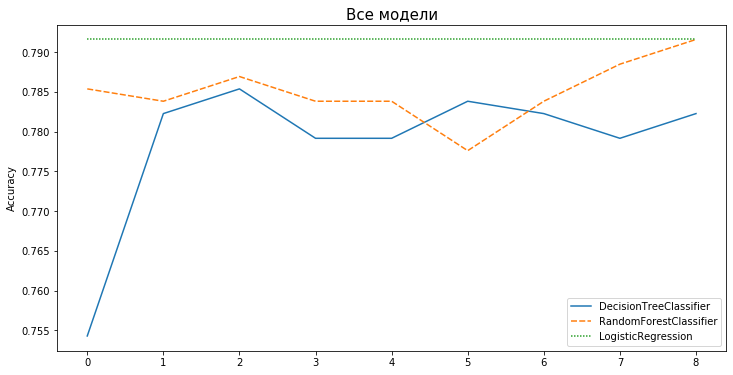

In [30]:
#Отрисуем график, чтобы наглядно увидеть, какая модель нас больше устраивает
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.title('Все модели', fontsize=15)
plt.xlabel('')
plt.ylabel('Accuracy')
sns.lineplot(data=df)

Выводы: 

- Исследовали три модели:  Случайный лес, Дерево решений и Логистическая Регрессия.
- Результаты:  
  - У Дерева Решений при глубине 3 аccuracy: 0.7853810264385692.  
  - У **Случайного Леса** при **50** деревьях аccuracy: **0.7916018662519441**.  
  - У Логистической Регрессии аccuracy: 0.7916018662519441.
  
- У последних двух моделей одинаковый результат, но у Случайного Леса высокое качество, эту модель и выберем. 

## Проверьте модель на тестовой выборке

In [31]:
#Проверим модель: Случайный лес на тестовой выборке при 40 деревьях
model = RandomForestClassifier(random_state=12345, n_estimators=50)
model.fit(train_features,train_target)
predictions = model.predict(test_features)
accuracy = accuracy_score(test_target, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.7931570762052877


При обучении на тестовой выборке получили **аccuracy 0.7931570762052877**.

## (бонус) Проверьте модели на адекватность

In [32]:
tariffs['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Придумаем простую модель и проверим, что наша предсказывает лучше. Это может быть угадывание.
Итак, в нашем датасете 69% - пользователи тарифа "Смарт". Пусть модель всегда предсказывает именно этот тариф, - точность будет около 69%, но у нашей модели точность выше и равна 79%. Вероятно, проверка на адекватность пройдена.